In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = 'drive/MyDrive/Research/data_collection/final_cleaned/final_dataset.csv'
df = pd.read_csv(path)
df.head()

,fcp,interactive,srt,dom_size,but,fmp,tbt,tbw,fci,cls,lcp,ux_index,fid_category,lcp_category,fcp_category,cls_category
0,810.0,1623.000353,148.574,222,95.844,810.0,1.0,964194,1582.0,0.000000,890.0,810.000000,1,1,2,1
1,791.0,1938.500000,34.172,1049,574.117,1028.5,134.0,2463660,1604.0,0.000000,1623.0,1313.142001,1,1,2,1
2,660.0,1141.000000,309.005,1814,217.650,813.0,68.0,571401,1006.0,0.000800,1440.0,999.346206,1,1,2,1
3,655.0,3584.500000,348.280,1413,1686.482,726.0,484.0,1628682,3204.0,0.028540,820.0,1023.158693,1,2,2,1
4,770.0,3351.000000,775.957,1156,1554.168,770.0,537.0,1737243,3071.0,0.033484,2881.0,1869.895174,1,2,2,2


In [ ]:
# Computing IQR
Q1 = df['ux_index'].quantile(0.25)
Q3 = df['ux_index'].quantile(0.75)
IQR = Q3 - Q1

# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
df = df.query('(@Q1 - 1.5 * @IQR) <= ux_index <= (@Q3 + 1.5 * @IQR)')

In [ ]:
df = df.drop(columns=['cls', 'dom_size', 'fid_category', 'lcp_category', 'fcp_category', 'cls_category'], axis = 1)
df.head()

,fcp,interactive,srt,but,fmp,tbt,tbw,fci,lcp,ux_index
0,810.0,1623.000353,148.574,95.844,810.0,1.0,964194,1582.0,890.0,810.000000
1,791.0,1938.500000,34.172,574.117,1028.5,134.0,2463660,1604.0,1623.0,1313.142001
2,660.0,1141.000000,309.005,217.650,813.0,68.0,571401,1006.0,1440.0,999.346206
3,655.0,3584.500000,348.280,1686.482,726.0,484.0,1628682,3204.0,820.0,1023.158693
4,770.0,3351.000000,775.957,1554.168,770.0,537.0,1737243,3071.0,2881.0,1869.895174


In [ ]:
df.shape

(75762, 10)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['ux_index'], axis = 1)
y = df['ux_index']
SEED = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=SEED)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=400, max_features='log2', min_samples_leaf=1, max_depth=23)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=23, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=400, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf.feature_importances_

array([0.03962919, 0.22101375, 0.18485401, 0.11054415, 0.05036013,
       0.0392105 , 0.10146644, 0.16148079, 0.09144104])

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
rmse_test = MSE(y_test, y_pred)**(1/2)
rmse_test

632.9824819527752

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_test = r2_score(y_test, y_pred)
r2_test

0.8336790882376739

In [ ]:
rank = pd.DataFrame(data = {
    'Features': X.columns,
    'Importance': np.array(rf.feature_importances_) * 100
})

In [ ]:
rank

,Features,Importance
0,fcp,4.034355
1,interactive,25.865896
2,srt,18.771512
3,but,10.302436
4,fmp,4.990506
5,tbt,4.397304
6,tbw,8.755702
7,fci,14.603341
8,lcp,8.278948


In [ ]:
rank = rank.sort_values(by='Importance')
rank

,Features,Importance
0,fcp,4.034355
5,tbt,4.397304
4,fmp,4.990506
8,lcp,8.278948
6,tbw,8.755702
3,but,10.302436
7,fci,14.603341
2,srt,18.771512
1,interactive,25.865896


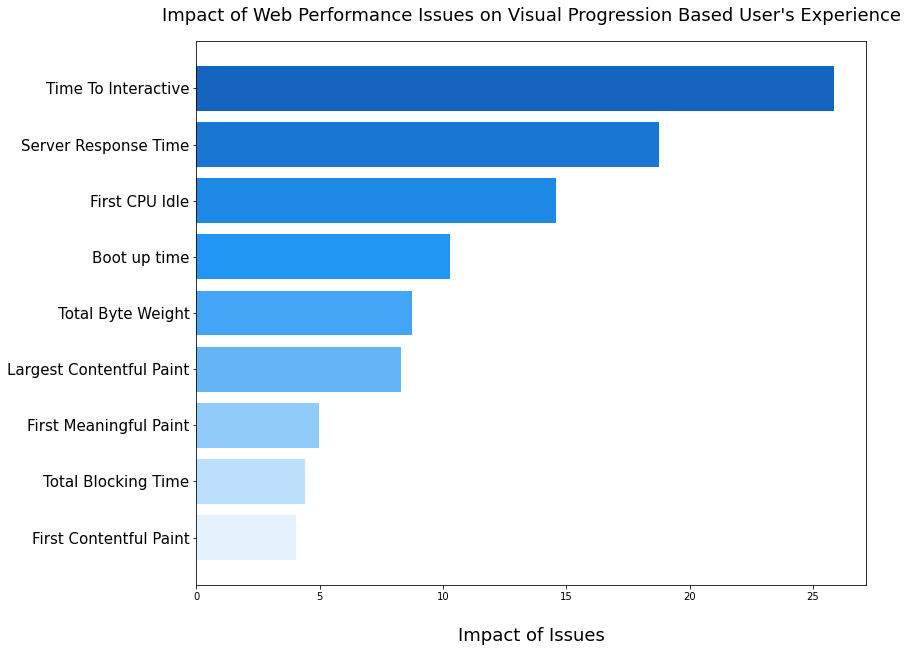

In [ ]:
plt.figure(figsize=(12, 10))
colors = [
 '#e3f2fd',
 '#bbdefb',
 '#90caf9',
 '#64b5f6',
 '#42a5f5',
 '#2196f3',
 '#1e88e5',
 '#1976d2',
 '#1565c0',
]

yset = [
  'First Contentful Paint',
  'Total Blocking Time',
  'First Meaningful Paint',
  'Largest Contentful Paint',
  'Total Byte Weight',
  'Boot up time',
  'First CPU Idle',
  'Server Response Time',
  'Time To Interactive'
]

plt.barh(y=yset, width=rank['Importance'], color=colors)
plt.title('Impact of Web Performance Issues on Visual Progression Based User\'s Experience', fontsize=18, pad=20)
plt.xlabel('Impact of Issues', fontsize=18, labelpad=25)
plt.rc('ytick',labelsize=15)
plt.show()

In [ ]:
from google.colab import files

df.to_excel('dset.xlsx')
files.download('dset.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>